## Q1: Understanding LSTM vs GRU (30 pts)
Before going deeper into your practical tasks, take some time to revise and make sure you understand the two major types of recurrent cells you will be using in this assignment: Long-Short Term Memory Units (LSTM) first introduced by Hochreiter and Schmidhuber [1997] and the more recent Gated Recurrent Units (GRU) by Cho et al. [2014]. Once you have done this, answer the following questions:

1. Can LSTMs (and respectively GRUs) just store the current input in the state ($c_t$ for LSTM and $h_t$ for GRU, in the class notation) for the next step? If so, give the gates activation that would enable this behaviour. If not, explain why not. [10 pts]

For LSTMs, not usually with the usual activation functions and with data larger than $~\pm 0.1$ (assuming we are ok with accuracy within ~0.000664). This is because the current input $x_t$ is processed by either a sigmoid or tanh activation function before being passed to the cell state $c_t$. If the inputs are scaled beforehand to a small range such as $-0.1$ to $0.1$, such that the tanh is close enough for practical purposes to linear (in the small central region), then yes, you would be able to store the current input in the cell state, by using the weights/biases/activations given below \[1\]. It may not allow gradients to flow though and may be unstable depending on the data. Alternatively you could replace the tanh activation function and use the identity function \[2\] - or ReLu/Leaky ReLu with inputs shifted by the cell state bias $b_c$ to be in the range $[0, \infty]$ \[3\] (can recover original input easily by subtracting $b_c$). Leaky ReLu would likely work better when learning this cell state bias, because it allows some gradient through on the negative side. You could also do the same with the input gate \[4\]. If the requirements are relaxed and we can just store a scaled down version of the current input in the cell state, then this would also be possible with $W_c$ weights such that the input is scaled down to the range $-0.1$ to $0.1$ \[5\] (the original input can be recovered by dividing by $W_c$).

$\odot =$ element-wise multiplication (Hadamard product)

$n_\kappa \in \mathbb{R}^\kappa =$ a vector or matrix of $n$s with shape $\kappa$

$\boldsymbol{\iota}_{\kappa} \in \mathbb{R}^{\kappa} =$ a vector or matrix of values large enough to saturate $\sigma_{\text{tanh}}$ or $\sigma_{\text{sigmoid}}$, with shape $\kappa$.

$\boldsymbol{I}_n =$ Identity matrix of dimension $n$

$\lambda \in \mathbb{R} =$ an arbitrary scalar value 

$W_\kappa', U_\kappa' =$ an arbitrary weight matrix for gate $\kappa$ (that's not used for storing input/cell state pass-through - could be empty)

$b_\kappa' =$ an arbitrary bias vector for gate $\kappa$ (also not used for storing input/cell state pass-through - could be empty)

$\kappa_t' =$ an arbitrary gate activation for gate $\kappa$ created from the components $W_\kappa', U_\kappa', b_\kappa'$, above (could be empty)

$x_t \in \mathbb{R}^d, \,\,\, c_t \in \mathbb{R}^j, \,\,\, h_t \in \mathbb{R}^j, \,\,\, \kappa_t \in \mathbb{R}^j$ for each gate $\kappa \in [f, i, o, z, r]$

$f_t = \sigma_{f}(W_f x_t  +  U_f h_{t-1}  +  b_f)$

$i_t = \sigma_{i}(W_i x_t  +  U_i h_{t-1}  +  b_i)$

$o_t = \sigma_{o}(W_o x_t  +  U_o h_{t-1}  +  b_o)$

$c_t = f_t \odot c_{t-1}  +  i_t \odot \sigma_c(W_c x_t  +  U_c h_{t-1}  +  b_c)$

$h_t = o_t \odot \sigma_h(c_t)$

$\sigma_{f}, \sigma_{i}, \sigma_{o} = \sigma_{\text{sigmoid}}$

$\sigma_{h}, \sigma_{c} = \sigma_{\text{tanh}}$

\[1\]

$x_t \in [-0.1, 0.1]^d$

$W_c = \begin{bmatrix} \boldsymbol{I}_d \\ W_c' \end{bmatrix}, \,\,\, U_c = \begin{bmatrix} 0_{d \times d} \\ U_c' \end{bmatrix}, \,\,\, b_c = \begin{bmatrix} 0_{d \times d} \\ b_c' \end{bmatrix}, \,\,\, W_f = \begin{bmatrix} 0_{d \times d} \\ W_f' \end{bmatrix}, \,\,\, U_f = \begin{bmatrix} 0_{d \times d} \\ U_f' \end{bmatrix}, \,\,\, b_f = \begin{bmatrix} -\boldsymbol{\iota}_{d} \\ b_f' \end{bmatrix}, \,\,\, f_t = \begin{bmatrix} 0_d \\ f_t' \end{bmatrix}$

$W_i = \begin{bmatrix} 0_{d \times d} \\ W_i' \end{bmatrix}, \,\,\, U_i = \begin{bmatrix} 0_{d \times d} \\ U_i' \end{bmatrix}, \,\,\, b_i = \begin{bmatrix} \boldsymbol{\iota}_{d \times d} \\ b_i' \end{bmatrix}, \,\,\, i_t = \begin{bmatrix} {1}_d \\ i_t' \end{bmatrix}, \,\,\, c_t = \begin{bmatrix} x_t \\ c_t' \end{bmatrix}$

\[2\]

$\sigma_{c} = \sigma_{\text{identity}}$

(weights, biases & activations same as in \[1\])

\[3\]

$\sigma_{c} = \sigma_{\text{ReLu}}$ or $\sigma_{\text{Leaky ReLu}}$

$b_c = \begin{bmatrix} \max(0_d, -\min(\mathcal{X})) \\ b_c' \end{bmatrix}, \,\,\, c_t = \begin{bmatrix} x_t + \lambda \\ c_t' \end{bmatrix}$, rest of weights/biases/activations same as in \[1\]

\[4\]

$x_t \in [-0.1, 0.1]^d$ or $\sigma_{i} = $\[$\sigma_{\text{identity}}$ or $\sigma_{\text{ReLu}}$ or $\sigma_{\text{Leaky ReLu}}$\]

$W_i = \begin{bmatrix} \boldsymbol{I}_d \\ W_i' \end{bmatrix}, \,\,\, U_i = \begin{bmatrix} 0_{d \times d} \\ U_i' \end{bmatrix}, \,\,\, b_i = $ as $b_c$ was in \[1\], or \[3\] if $\sigma_{i} = \sigma_{\text{ReLu}}$ or $\sigma_{\text{Leaky ReLu}}$

$W_c = \begin{bmatrix} 0_{d \times d} \\ W_c' \end{bmatrix}, \,\,\, U_c = \begin{bmatrix} 0_{d \times d} \\ U_c' \end{bmatrix}, \,\,\, b_c = \begin{bmatrix} \boldsymbol{\iota}_{d \times d} \\ b_c' \end{bmatrix}, \,\,\, i_t = \begin{bmatrix} x_t + \lambda \\ i_t' \end{bmatrix}, \,\,\, c_t = \begin{bmatrix} x_t + \lambda \\ c_t' \end{bmatrix}$, rest of weights/biases/activations same as in \[1\]

\[5\]

$W_c = \begin{bmatrix} 0.1\boldsymbol{I}_d \div \max(|\mathcal{X}|) \\ W_c' \end{bmatrix}, c_t = \begin{bmatrix} \lambda x_t \\ c_t' \end{bmatrix}$, rest of weight/biases/activations as in \[1\]

For GRUs, the same principles apply, except we use the new memory content gate $\tilde{h}_t$, since this is the only gate where we can get the current input signal to the new cell state $h_t$ (without it being multipled with $h_{t-1}$). We could use $W_h$ below to scale the inputs or swap out the tanh for an identity/ReLu/Leaky ReLu and the learning rate/stability results would be similar to the case above.

$z_t = \sigma_{f}(W_z x_t  +  U_z h_{t-1}  +  b_z)$

$r_t = \sigma_{i}(W_r x_t  +  U_r h_{t-1}  +  b_r)$

$\tilde{h}_t = \sigma_{h}(W_h x_t  +  U_h (r_t \odot h_{t-1})  +  b_h)$

$h_t = (1 - z_t) \odot \tilde{h} + z_t \odot h_{t-1}$

$\sigma_{f}, \sigma_{i}, \sigma_{o} = \sigma_{\text{sigmoid}}$

$\sigma_{h} = \sigma_{\text{tanh}}$

\[1\]

$x_t \in [-0.1, 0.1]^d$

$W_h = \begin{bmatrix} \boldsymbol{I}_d \\ W_h' \end{bmatrix}, \,\,\, b_h = \begin{bmatrix} 0_{d \times d} \\ b_h' \end{bmatrix}, \,\,\, W_z = \begin{bmatrix} 0_{d \times d} \\ W_z' \end{bmatrix}, \,\,\, U_z = \begin{bmatrix} 0_{d \times d} \\ U_z' \end{bmatrix}, \,\,\, b_z = \begin{bmatrix} -\boldsymbol{\iota}_{d} \\ b_z' \end{bmatrix}$

$U_h = \begin{bmatrix} 0_{d \times d} \\ U_h' \end{bmatrix}$ or $W_r = \begin{bmatrix} 0_{d \times d} \\ W_r' \end{bmatrix}, \,\,\, U_r = \begin{bmatrix} 0_{d \times d} \\ U_r' \end{bmatrix}, \,\,\, b_r = \begin{bmatrix} -\boldsymbol{\iota}_d \\ b_r' \end{bmatrix}, \,\,\, r_t = \begin{bmatrix} 0_{d \times d} \\ r_t' \end{bmatrix}$

$z_t = \begin{bmatrix} 0_d \\ z_t' \end{bmatrix}, \,\,\, h_t = \tilde{h}_t = \begin{bmatrix} x_t \\ h_t' \end{bmatrix}$

\[2\]

$\sigma_{h} = \sigma_{\text{identity}}$

(weights, biases & activations same as in \[1\])

\[3\]

$\sigma_{h} = \sigma_{\text{ReLu}}$ or $\sigma_{\text{Leaky ReLu}}$

$b_h = \begin{bmatrix} \max(0_d, -\min(\mathcal{X})) \\ b_h' \end{bmatrix}, \,\,\, h_t = \tilde{h}_t = \begin{bmatrix} x_t + \lambda \\ h_t' \end{bmatrix}$, rest of weights/biases/activations same as in \[1\]

\[5\]

$W_h = \begin{bmatrix} 0.1\boldsymbol{I}_d \div \max(|\mathcal{X}|) \\ W_h' \end{bmatrix}, h_t = \tilde{h}_t = \begin{bmatrix} \lambda x_t \\ h_t' \end{bmatrix}$, rest of weight/biases/activations as in \[1\]

2. Can LSTMs (and respectively GRUs) just store a previous state into the current state and ignore the current input? If so, give the gates' activation that would enable this. If not, explain why not. [10 pts]

For LSTMs, yes, by saturating the forget gate $f_t$ to 1 and input gate $i_t$ (or the cell state activation $\sigma_c$, via $W_c$, $U_c$, $b_c$) to 0.

$c_t = c_{t-1}, \,\,\, f_t = 1_j, \,\,\, W_f = 0_{j \times j}, \,\,\, U_f = 0_{j \times j}, \,\,\, b_f = \boldsymbol{\iota}_j$

$[ \,\, i_t = 0_j, \,\,\, W_i = 0_{j \times j}, \,\,\, U_i = 0_{j \times j}, \,\,\, b_i = -\boldsymbol{\iota}_j \,\, ]$ or $[ \,\, W_c = 0_{j \times j}, \,\,\, U_c = 0_{j \times j}, \,\,\, b_c = 0_j \,\, ]$

For GRUs we can do the same - saturate the update gate $z_t$ to 1.

$h_t = h_{t-1}, \,\,\, z_t = 1_j, \,\,\, W_z = 0_{j \times j}, \,\,\, U_z = 0_{j \times j}, \,\,\, b_z = \boldsymbol{\iota}_j$

3. Are GRUs a special case of LSTMs? If so, give the expression of the GRU gates in term of LSTM's gates ($o_t, i_t, f_t$). If not, give a counter-example. Assume here the same input. [10 pts]

No, because in an LSTM the cell state contributes to the cell output through a tanh activation. Thus, unless we replace the LSTM cell output activation ($\sigma_{h}$) (or output activation $\sigma_o$) with the identity function, or use only non-negative state/output values with a ReLu/Leaky ReLu, or we only use states/outputs in the range $-0.1$ to $0.1$, then we can't easily pass the previous cell output into the state and output it again (repeat the last output). For GRUs this is easy because the cell state is already the cell output and we can repeat it simply by saturating the update gate $z_t$ to 1. The counterexample would be when we want to repeat a cell output $h_t = h_{t-1}$ with values in the full range -1 to 1.


# Results

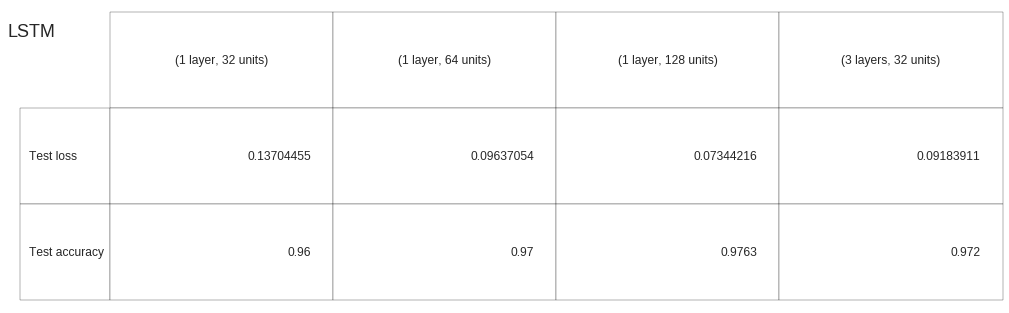

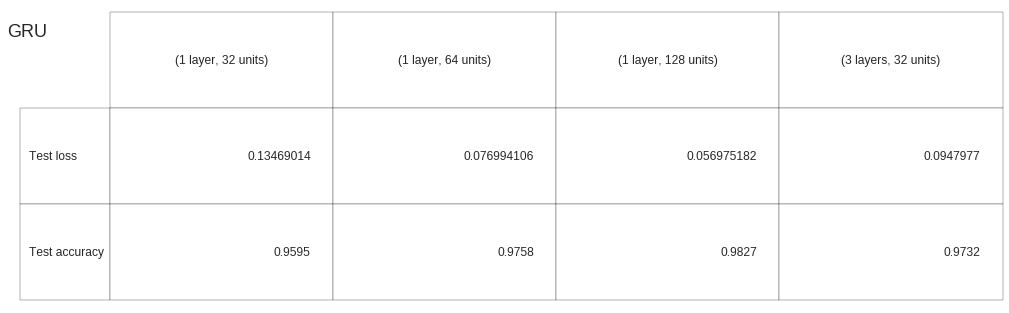

In [19]:
plot_summary_table(experiment_results)

## Q3: Analyse the results (20 pts + 10 pts)

1. How does this compare with the results you obtained in the first assignment(DL1), when training a model that "sees" the entire image at once? Explain differences. [5 pts]

The deeper models trained in DL1 (especially the convolutional) were slightly better at the classification, but the difference may be negligible. Models that see the entire image at once may be sufficient and slightly better for this task because there are not many long range dependencies - for example, the shapes of the number are contiguous blocks, with roughly equally distributed predictive importance across the figure, and no long range dependencies.

2. Let us take a look closer look at one of the trained models: say GRU (32). Plot the outputs of the RNN layer and hidden state over time. In particular, look at the first 3-5 time steps. Plot the input image along side. 
You can use ```python
plt.imshow(output_GRU_over_time)
```
for these, where ```output_GRU_over_time.shape``` is (T=28,hidden_units) dimensional. What do you observe? Show at least one pair of these plots to support your observation(s). [5 pts]

The differentiation (divergence) between the cell output values doesn't begin until there is some actual input (black pixels) passed to the network, however, there is some noise, but low variance. The values then slowly differentiate when scanning the first (not super revealing) few pixels of the figure. 

3. Now, look at the last 3-5 time steps. What do you observe? When is the classification decision made? To validate your answer to the second part of the question, provide the classification predictions for the last 5 time steps -- that is, pretend whatever the output of the GRU is at that time step is in fact the last output in the computation, and feed that into the classification mapping. [10 pts] 

The last ~5 outputs are very similar if not the same - this is because there is no more input left (the entire number has been seen) and so the network just has to remember "which digit" for the remaining sequence. In the example shown, the "actual" classification decision is made only after this point - it could be made earlier, but it is not guaranteed because the network has only been trained to output the classification for the whole image on the very last time step - and due to the data in this case, after the last non-empty input. The cell output before this point may occasionally correlate with this increasingly over the timesteps, but, as shown in the example, will often correlate to the classification based on the most recent data (the last ~5 rows of the image scanned) - the classification is 7 when scanning the long, diagonal stroke, 8 when scanning over the central cross, 0 when scanning the loop closure, then finally 6 when the entire digit is seen and there is no more input.

**[Bonus]** Let's looking inside the computation. Take one of the previous LSTM models (for simplicity pick one of the one-layer recurrence models) and track the status of the gates ($o_t, i_t, f_t$) over time. Note that if you used the provided RNNCell wrappers (BasicLSTMCell and co) in tensorflow, these will keep this information hidden, so you will need to implement your own version of this recurrence layer, or mirror the one in tensorflow, but now exposing these hidden variables. A bit of warning: this is not trivial and will require some thinking on the coding side, but it will also provide you with a more informative way of visulazing the inner computation.  [10 pts]

**Word limit:** 300 words or less 

# Analysis of results

**Digit (input)**

In [72]:
plt.imshow(binarized_input_image)

**GRU cell output**

In [73]:
plt.imshow(output_GRU_over_time)

**GRU cell output (first 5 timesteps)**

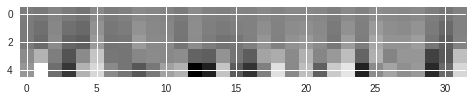

In [74]:
plt.imshow(output_GRU_over_time[:5])

**GRU cell output (last 5 timesteps)**

In [75]:
plt.imshow(output_GRU_over_time[-5:])

**Y prediction (which digit 0-9) probability distribution over all timesteps**

In [76]:
plt.imshow(y_GRU_over_time)

**Y prediction (which digit 0-9) over all timesteps**

In [83]:
print(np.argmax(y_GRU_over_time, axis=1))

[4 4 4 2 7 7 7 7 3 3 3 7 7 7 7 8 8 8 8 8 8 8 8 0 0 6 6 6]


**Y prediction (which digit 0-9) probability distribution over last 10 timesteps**

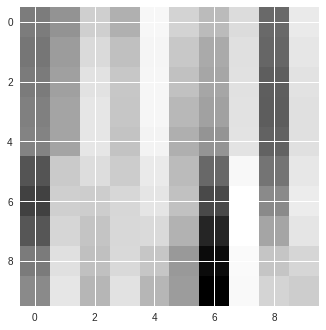

In [79]:
plt.imshow(y_GRU_over_time[-10:])